<h1><center> MATH 472/572 Computational Statistics - Spring 2020 </h1></center>
<h2><center> Homework 8 - Due March 31, Tuesday </h2></center>
<h3><center> Instructor: Leming Qu </h3></center>

<h1><center> Student: Arash Modaresi Rad </h1></center>

## Coding Assignments:

In [1]:
import numpy as np
import seaborn as sb
import sympy as sym
from sympy import *
from numpy import ma
from numpy.linalg import inv
from numpy import linalg as LA
import pandas as pd 
import matplotlib.pyplot as plt  
import functools as fts
from tabulate import tabulate as tabulate
from scipy.stats import norm, uniform, lognorm, gamma, poisson
from scipy import stats
from scipy import integrate
import rpy2.robjects as robjects
#rpy2.robjects.numpy2ri.activate()
from rpy2.robjects.packages import importr
vgam = importr('VGAM')
from rpy2.robjects import numpy2ri
from rpy2.robjects import pandas2ri
numpy2ri.activate()
#pandas2ri.activate()

np.random.seed(1100)

In [2]:
#conda install -c r rpy2

In [3]:
#conda install -c r r-VGAM

In [4]:
#conda install tzlocal

**1. (20 Points)Implementing Example 6.3 on page 165 of Computational Statistics, reproduce
FIGURE 6.7.**

Intial varaibles:

In [5]:
m = 100000
n = 5000
x = np.random.normal(0,1,m)
Y = vgam.rslash(m)

In [6]:
class Functions:
    """This function returns function values as well as their derivatives"""
    
    def __init__(self):
        self.func_value = 0
        
    def Dist_1(self, array):
        dist = vgam.dslash(array) / norm.pdf(array, 0,1)
        dist = dist / sum(dist)
        return dist

    def Dist_2(self, array):
        dist = norm.pdf(array, 0,1) / vgam.dslash(array) 
        dist = dist / sum(dist)
        return dist

Lest compute the wieghts required for resampleing

In [7]:
X = robjects.r.matrix(x)
Weights_1 = np.reshape(np.array(Functions().Dist_1(X)), m)
X = np.random.choice(x, size = n, replace = True, p = Weights_1)

Weights_2 = np.reshape(np.array(Functions().Dist_2(Y)), m)
U = np.random.choice(np.reshape(np.array(Y), m), size = n, replace = True , p = Weights_2)

Plotting the distributions

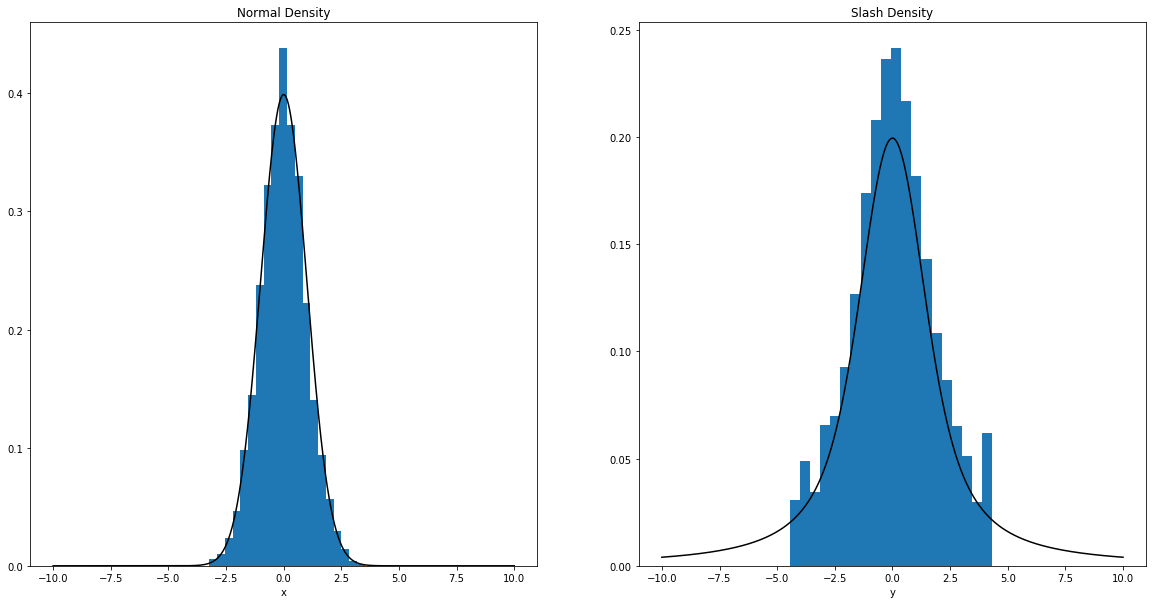

In [8]:
X_axis = np.linspace(-10,10,10000)
Y_axis = np.reshape(np.array(vgam.dslash(robjects.r.matrix(X_axis))), 10000)
Y_axis_prime = norm.pdf(X_axis, 0,1)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.hist(U, 20, density=True)
plt.plot(X_axis, Y_axis_prime, 'k-')
plt.title('Normal Density')
plt.xlabel('x')
plt.subplot(1, 2, 2)
plt.hist(X, 20, density = True)
plt.plot(X_axis, Y_axis, 'k-')
plt.title('Slash Density')
plt.xlabel('y')
plt.show()

**2. (20 Points) Implementing SIR algorithm in Example 6.4 on page 166 for the case of Example
6.2. Report your estimated posterior mean and posterior standard deviation. Show the
generated random samples by superimposing the following three items in a single plot:**

(a) a relative frequency histogram with appropriate number of bars for your generated random numbers with sample size n = 5000;

(b) an estimated probability density curve based on the generated random numbers;

(c) the true posterior probability density curve

In [9]:
samples = np.random.lognormal(np.log(4), 0.5, m)
data = np.array([8,3,4,3,1,7,2,6,2,7])

compute weights for random number generation

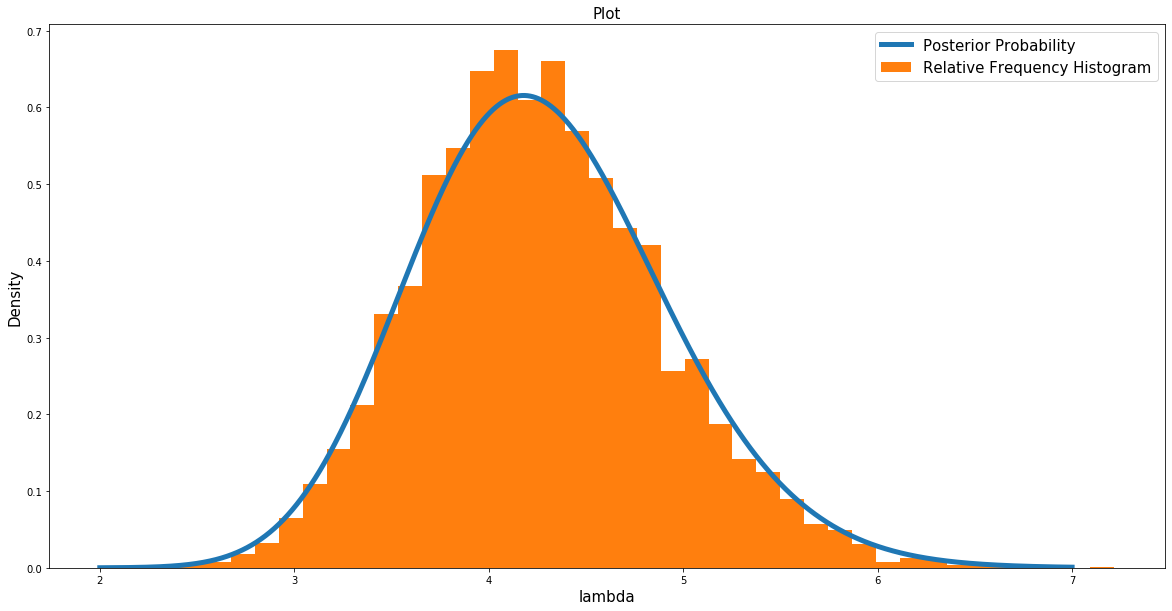

In [10]:
X_axis = np.linspace(2, 7, n)
samples_2 = lognorm.pdf(X_axis, 4, loc = 0.5, scale = np.log(4)) 

Weights = np.zeros(m)
for i in range (m):
    Weights[i] = np.product(poisson.pmf(data, samples[i]))
Weights2 = Weights.copy()
Weights = Weights / np.sum(Weights)

Weights3 = np.zeros(n)
for i in range (n):
    Weights3[i] = np.product(poisson.pmf(data, X_axis[i]))
Weights4 = Weights3.copy()
Weights3 = Weights3 / np.sum(Weights3)

p_samples = np.random.choice(samples, size = n, replace = True, p = Weights)
actual_posterior = Weights4 * samples_2 / integrate.simps(Weights4 * samples_2, X_axis, even = 'first')


plt.figure(figsize = (20, 10))
plt.plot(X_axis,actual_posterior, linewidth = 5, label='Posterior Probability')
plt.hist(p_samples, 40, density = True,  label="Relative Frequency Histogram")
plt.legend(fontsize = 15)
plt.xlabel('lambda',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Plot',fontsize=15)
plt.show()

In [11]:
print("The estimated posterior mean is: {}".format(np.mean(p_samples)))

The estimated posterior mean is: 4.262117237622517


In [12]:
print("The estimated posterior standard deviation is: {}".format(np.std(p_samples)))

The estimated posterior standard deviation is: 0.6230014461923291
